## Perform Chi-Square test for Bank Churn prediction (find out different patterns on customer leaves the bank)  . Here I am considering only few columns to make things clear

### Import libraries

In [2]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Get the data

In [6]:
churn_df = pd.read_csv('bank.csv')

In [7]:
churn_df.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


### Here we have 4 category predictors and one category response. Exited, the response column represnts customer left the bank or not.

## Before performig Ch-Square test we have to make sure data is label encoded.

In [9]:
label_encoder = LabelEncoder()
churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])
churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])

In [11]:
churn_df.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,0,0,1,1,1
1,2,0,0,1,0
2,0,0,1,0,1
3,0,0,0,0,0
4,2,0,1,1,0


## Chi-Square test 

In [13]:
from sklearn.feature_selection import chi2

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [14]:
X = churn_df.drop('Exited',axis=1)
y = churn_df['Exited']

In [15]:
chi_scores = chi2(X,y)

In [16]:
chi_scores

(array([ 11.85325057,  51.53992627,   0.15004097, 118.19941432]),
 array([5.75607838e-04, 7.01557451e-13, 6.98496209e-01, 1.56803624e-27]))

### here first array represents chi square values and second array represnts p-values

In [17]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

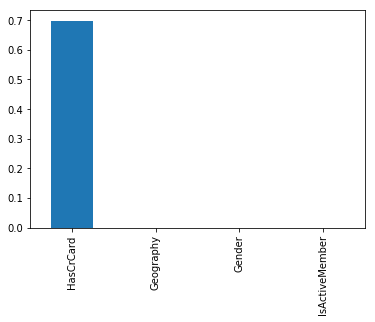

In [19]:
p_values.plot.bar()

### Since HasCrCard has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training